# Multivariate Data Sets

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

---
Multivariate analysis is the branch of statistics that generalizes methods of inferential statistics, so that a population $X$ can be characterized through a finite collection of random variables $X_i$. i.e multivariated distribution of random vectors. E.g. an animal specie can be characterized through quantitative and qualitative variables as they are: body height, body width, weight, head height, head width, leg size, hair color, eye color, and the like. these variables are called explicatives.

$$ \vec{X} = (X_1,X_2,...,X_p) $$

As in classical inferential statistics, in multivariate analysis the main idea is either to generalize patterns or obtain useful conclusions from a multivariate population based on the information of the sample. However in this case the information is multidimensional.

#### Statistical learning and machine learning

There are some situations in which it is necessary to make inferences about the future behavior of one or several variables in terms of random vectors, infer the population type of a random vector since there are several populations that share the same explicative variables but with different distribution, or find boundaries and structures of clustering since there are different types of mixed populations of which the membership of the vectors is unknown. 

For these situations and some more, exist results based on multivariate analysis that provides methods for a non-exactly theorical solutions to the problem, this situation is called **statistical learning**. In addition to the last a computational approach is added considering algorithms, complexity, computational expenditure, data structures, etc. So the set of these techniques are known as **machine learning**.


#### Data matrix

Suppose that you have n obervations of the random vector $\vec{X}$ (the distribution of the population), such that each vector have p explicative variables. Then the set of observations $\{\vec{X}_i\}_{i=1}^n=\{(X_1,...,X_p)_i\}_{i=1}^n$ can be represented as a matrix called data matrix $\textbf{X}_{n \times p}$, the rows of this matrix represent de index of the observation and each column represent one of the explicative variables.

$$\textbf{X}_{n \times p}=
\left[ \begin{array}{ccccc}
x_{1 1} & \cdots & x_{1 j} & \cdots & x_{1 p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i 1} & \cdots & x_{i j} & \cdots & x_{i p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n 1} & \cdots & x_{n j} & \cdots & x_{n p} \end{array} \right]
$$

**Notation:**
* $\textbf{x}_i$ Indicates the i-th row of $\textbf{X}$, however it will operated as a column.
* $X_j$ Indicates the j-th column of $\textbf{X}$

**Example 1.1 - 1 [Iris plants]**: The following datset contains samples of 3 iris plants populations of 50 obervations each one. The 3 populations that share the same explicative variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Species: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

URL of the dataset.
https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import warnings

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
irisPath = 'DataSets/Iris.csv'
irisPD = pd.read_csv(irisPath)

display(irisPD[irisPD['Species']=='Iris-setosa'][:3])
display(irisPD[irisPD['Species']=='Iris-versicolor'][:3])
display(irisPD[irisPD['Species']=='Iris-virginica'][:3])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


### Plotting Multivariate Data

**Scatter plots matrix**: A scatter plot matrix arranges all possible two-way scatter plots in a p × p matrix. These displays can be enhanced with brushing, in which individual points or groups of points can be selected in one plot, and be simultaneously highlighted in the other plots.

**Example 1.1 - 2 [Scatter plot matrix of iris plants]**

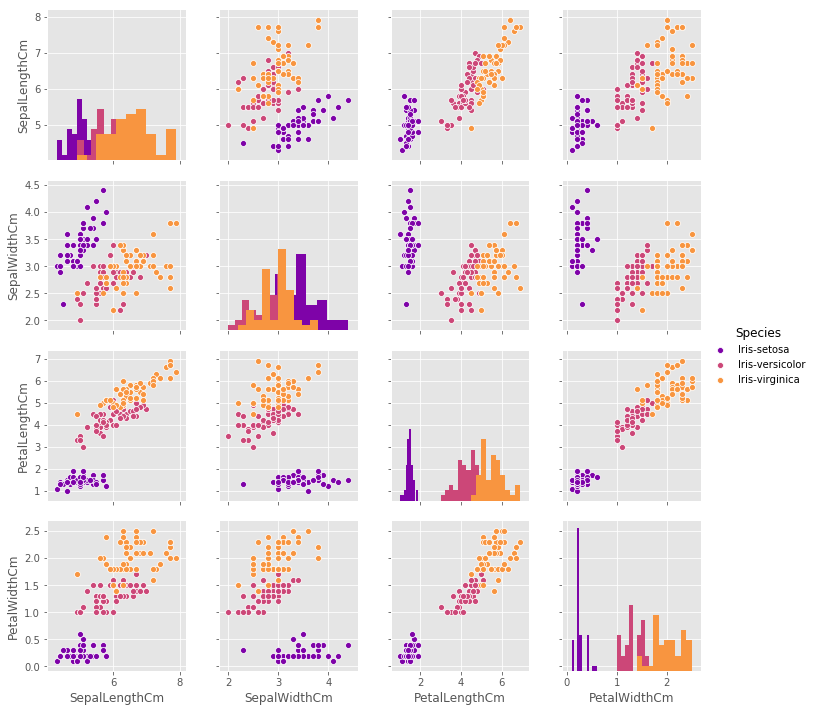

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

smp = sns.pairplot(irisPD,hue="Species",diag_kind='hist',palette="plasma")

# Multivariate descriptive statistics
---

#### Mean vector

For the j-th column of the data matrix, the sample mean of the values $\{x_{1j},...,x_{nj}\}$ is given by $\bar{x_j}=\frac{1}{n}\sum_{i=1}^{n}x_{ij}$. If we assume that the sample is independent and identically distributed then the expected value $E[X_j]=\mu_j=E[\bar{x_j}]$ because $\bar{x_j}$ it's the unbiased estimator of $\mu_j$. Another aspect we know of the multivariate distributions is that if you have a random vector $\vec{X}$ of dimension p, then its expected value is given by:

$$
\begin{align*}
\vec{\mu} = E[\vec{X}] & = (E[X_1],\dotsc,E[X_j],\dotsc,E[X_p]) \\
& = (E[\bar{x_1}],\dotsc,E[\bar{x_j}],\dotsc,E[\bar{x_j}]) \\
& = E[(\bar{x_1},\dots,\bar{x_j},\dotsc,\bar{x_p})]\\
& = E\left[\left(\frac{1}{n}\sum_{i=1}^{n}x_{i1},\dots,\frac{1}{n}\sum_{i=1}^{n}x_{ij},\dotsc,\frac{1}{n}\sum_{i=1}^{n}x_{ip}\right)\right]\\
& = E\left[\frac{1}{n} \left(\sum_{i=1}^{n}x_{i1},\dots,\sum_{i=1}^{n}x_{ij},\dotsc,\sum_{i=1}^{n}x_{ip}\right)\right]\\
& = E\left[\frac{1}{n} \sum_{i=1}^{n} \left(x_{i1},\dots,x_{ij},\dotsc,x_{ip}\right)\right]\\
\vec{\mu} & = E\left[\frac{1}{n} \sum_{i=1}^{n} \textbf{x}_i\right]\\
\end{align*}
$$

Which means that $\frac{1}{n} \sum_{i=1}^{n} \textbf{x}_i$ denoted by $\bar{\textbf{x}}$ is the unbiased estimator for the expected value $\vec{\mu}$ of the random vector $\vec{X}$ and is called **sample mean vector**.

#### Covariance matrix

Similarly to the univariate case, it is possible to generalize the definition of variance for a random vector of dimension p (in terms of a grammian matrix) as follows:

$$
\begin{align*}
\Sigma_{p \times p} & = E \left[ (\vec{\textbf{X}}-\vec{\mu})(\vec{\textbf{X}}-\vec{\mu})^T  \right]\\
& = E \left[ 
    \left( \begin{array}{c}
    X_1 - \mu_1 \\
    \vdots  \\
    x_p - \mu_p \end{array} \right)
    \left(X_a - \mu_1,\dotsc,X_p-\mu_p \right)
\right] \\
& = E \left[ \begin{array}{ccccc}
(X_1-\mu_1)(X_1-\mu_1) & \cdots & (X_1-\mu_1)(X_j-\mu_j) & \cdots & (X_1-\mu_1)(X_p-\mu_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
(X_i-\mu_i)(X_1-\mu_1) & \cdots & (X_i-\mu_i)(X_j-\mu_j) & \cdots & (X_i-\mu_i)(X_p-\mu_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
(X_p-\mu_p)(X_1-\mu_1) & \cdots & (X_p-\mu_p)(X_j-\mu_j) & \cdots & (X_p-\mu_p)(X_p-\mu_p) \end{array} \right]\\
& = \left[ \begin{array}{ccccc}
E[(X_1-\mu_1)(X_1-\mu_1)] & \cdots & E[(X_1-\mu_1)(X_j-\mu_j)] & \cdots & E[(X_1-\mu_1)(X_p-\mu_p)] \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
E[(X_i-\mu_i)(X_1-\mu_1)] & \cdots & E[(X_i-\mu_i)(X_j-\mu_j)] & \cdots & E[(X_i-\mu_i)(X_p-\mu_p)] \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
E[(X_p-\mu_p)(X_1-\mu_1)] & \cdots & E[(X_p-\mu_p)(X_j-\mu_j)] & \cdots & E[(X_p-\mu_p)(X_p-\mu_p)] 
\end{array} \right]\\
& = \left[ \begin{array}{ccccc}
Cov(X_1,X_1) & \cdots & Cov(X_1,X_j) & \cdots & Cov(X_1,X_p)\\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
Cov(X_i,X_1)& \cdots & Cov(X_i,X_1) & \cdots & Cov(X_i,X_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
Cov(X_p,X_1) & \cdots & Cov(X_p,X_j) & \cdots & Cov(X_p,X_p) 
\end{array} \right]\\
\Sigma_{p \times p} & = \left[ \begin{array}{ccccc}
\sigma_{11} & \cdots & \sigma_{1j} & \cdots & \sigma_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{i1} & \cdots & \sigma_{ij} & \cdots & \sigma_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{p1} & \cdots & \sigma_{pj} & \cdots & \sigma_{pp} 
\end{array} \right]\\
\end{align*}
$$

The unbiased estimator for the covariance matrtix, is the sample covariance matrtix.

$$E[\textbf{S}_{p \times p}] = \Sigma_{p \times p} $$

**proof:** A matrix converges to another if only if the entries converges. Now consider the entry the following statistic where $x_{ij}$ is the ith, j-th entry of $\mathbf{X_{n \times p}}$, $\bar{x_i}$ is the sample mean of the i-th column, $\bar{x_j}$ is the sample mean of the j-th column, $\mu_i = E[X_i]$ and $\mu_j = E[X_j]$.

$$
\begin{align*}
\sum_{k=0}^n (x_{ki} - \bar{x_i})(x_{kj} - \bar{x_j}) &= \sum_{k=0}^n (x_{ki} - \bar{x_i} -\mu_i + \mu_i)(x_{kj} - \bar{x_j} -\mu_j + \mu_j)\\
& = \sum_{k=0}^n ((x_{ki}-\mu_i)+(\mu_i-\bar{x_i}))((x_{kj}-\mu_j)+(\mu_j-\bar{x_j}))\\
& = \sum_{k=0}^n (x_{ki}-\mu_i)(x_{kj}-\mu_j)+(x_{ki}-\mu_i)(\mu_j-\bar{x_j})+(\mu_i-\bar{x_i})(x_{kj}-\mu_j)+ (\mu_i-\bar{x_i})(\mu_j-\bar{x_j})\\
\sum_{k=0}^n (x_{kj} - \bar{x_i})(x_{kj} - \bar{x_j})& = \sum_{k=0}^n (x_{ki}-\mu_i)(x_{kj}-\mu_j)-(x_{ki}-\mu_i)(\bar{x_j}-\mu_j)-(\bar{x_i}-\mu_i)(x_{kj}-\mu_j)+ (\bar{x_i}-\mu_i)(\bar{x_j}-\mu_j)\\
E\left[\sum_{k=0}^n (x_{kj} - \bar{x_i})(x_{kj} - \bar{x_j})\right]& = E \left[ \sum_{k=0}^n (x_{ki}-\mu_i)(x_{kj}-\mu_j)-(x_{ki}-\mu_i)(\bar{x_j}-\mu_j)-(\bar{x_i}-\mu_i)(x_{kj}-\mu_j)+ (\bar{x_i}-\mu_i)(\bar{x_j}-\mu_j) \right]\\
& = \sum_{k=0}^n  E[(x_{ki}-\mu_i)(x_{kj}-\mu_j)]-E[(x_{ki}-\mu_i)(\bar{x_j}-\mu_j)]-E[(\bar{x_i}-\mu_i)(x_{kj}-\mu_j)]+E[(\bar{x_i}-\mu_i)(\bar{x_j}-\mu_j)]\\ 
& = \sum_{k=0}^n  Cov(x_{ki},x_{kj})-Cov(x_{ki},\bar{x_j})- Cov(\bar{x_i},x_{kj}) + Cov(\bar{x_i},\bar{x_j}) \\ 
& = \sum_{k=0}^n  Cov(x_{ki},x_{kj})- \sum_{k=0}^n Cov(x_{ki},\bar{x_j})- \sum_{k=0}^n Cov(\bar{x_i},x_{kj}) + \sum_{k=0}^n Cov(\bar{x_i},\bar{x_j}) \\ 
& = \sum_{k=0}^n  Cov(x_{ki},x_{kj})-\sum_{k=0}^n Cov\left(x_{ki},\frac{1}{n}\sum_{l=0}^n x_{lj}\right)-\sum_{k=0}^n Cov\left( \frac{1}{n}\sum_{l=0}^n x_{li},x_{kj}\right)+\sum_{k=0}^n Cov \left( \frac{1}{n}\sum_{l=0}^n x_{li},\frac{1}{n}\sum_{s=0}^n x_{sj}\right)\\
& = \sum_{k=0}^n  Cov(x_{ki},x_{kj})-\sum_{k=0}^n \frac{1}{n}\sum_{l=0}^nCov(x_{ki},x_{lj})- \sum_{k=0}^n \frac{1}{n}\sum_{l=0}^n Cov( x_{li},x_{kj})+\sum_{k=0}^n \frac{1}{n}\sum_{l=0}^n \frac{1}{n}\sum_{s=0}^n Cov(x_{li},x_{sj})\\
& = \sum_{k=0}^n  Cov(x_{ki},x_{kj})-\frac{1}{n} \sum_{k=0}^n \sum_{l=0}^n Cov(x_{ki},x_{lj})-\frac{1}{n}\sum_{k=0}^n \sum_{l=0}^n Cov( x_{li},x_{kj})+ \frac{1}{n^2} \sum_{k=0}^n \sum_{l=0}^n \sum_{s=0}^n Cov(x_{li},x_{sj})\\
& = \sum_{k=0}^n  Cov(x_{ki},x_{kj})-\frac{1}{n}\sum_{k=0}^n Cov(x_{ki},x_{kj})-\frac{1}{n}\sum_{k=0}^n Cov(x_{ki},x_{kj})+\frac{1}{n^2} n \sum_{l=0}^n  Cov(x_{li},x_{lj})\\
& = \sum_{k=0}^n  Cov(X_i,X_j)-\frac{1}{n}\sum_{k=0}^n Cov(X_i,X_j)-\frac{1}{n}\sum_{k=0}^n Cov(X_i,X_j)+\frac{1}{n} \sum_{l=0}^n Cov(X_i,X_j)\\
& = n Cov(X_i,X_j)-\frac{1}{n} n Cov(X_i,X_j)-\frac{1}{n} n Cov(X_i,X_j)+\frac{1}{n} n Cov(X_i,X_j)\\
& = n Cov(X_i,X_j)-Cov(X_i,X_j)\\
& = (n-1)Cov(X_i,X_j)\\
\frac{1}{(n-1)} E\left[\sum_{k=0}^n(x_{kj}-\bar{x_i})(x_{kj}-\bar{x_j})\right]&=Cov(X_i,X_j)\\
E\left[\frac{1}{(n-1)}\sum_{k=0}^n(x_{kj}-\bar{x_i})(x_{kj}-\bar{x_j})\right]&=Cov(X_i,X_j)\\
\end{align*}
$$

This implies that $\frac{1}{(n-1)}\sum_{k=0}^n(x_{kj}-\bar{x_i})(x_{kj}-\bar{x_j})$ is the unbiased estimator of  $Cov(X_i,X_j)$. Let's define the marix $\textbf{S}_{p \times p}$ as:

$$[\textbf{S}]_{i,j} = \left[\frac{1}{(n-1)}\sum_{k=0}^n(x_{kj}-\bar{x_i})(x_{kj}-\bar{x_j})\right]$$

So, by the last result it follows:

$$
E[\textbf{S}_{p \times p}] =  E
\left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right]
= 
\left[ \begin{array}{ccccc}
\sigma_{11} & \cdots & \sigma_{1j} & \cdots & \sigma_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{i1} & \cdots & \sigma_{ij} & \cdots & \sigma_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{p1} & \cdots & \sigma_{pj} & \cdots & \sigma_{pp} 
\end{array} \right] 
= \Sigma_{p \times p} \\
$$

Since $S_{ij}$ is an ubiased estimator of $Cov(X_i,X_j)$ by the **Law of Large Numbers**

$$\lim_{n\to\infty} \frac{1}{(n-1)}\sum_{k=0}^n(x_{kj}-\bar{x_i})(x_{kj}-\bar{x_j}) =  Cov(X_i,X_j)$$

That implies that the matrix $\textbf{S}_{p \times p}$ converges to $\Sigma_{p \times p}$ for large enough n.

$$
\textbf{S}_{p \times p}= 
\left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right]
\approx
\left[ \begin{array}{ccccc}
\sigma_{11} & \cdots & \sigma_{1j} & \cdots & \sigma_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{i1} & \cdots & \sigma_{ij} & \cdots & \sigma_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{p1} & \cdots & \sigma_{pj} & \cdots & \sigma_{pp} 
\end{array} \right] 
= \Sigma_{p \times p}
\\
$$

#### Correlation matrix (depende measure)

The most familiar measure of dependence between two quantities is the Pearson product-moment correlation coefficient, or **Pearson's correlation coefficient**, commonly called **the correlation coefficient**. It is obtained by dividing the covariance of the two variables by the product of their standard deviations, this measure could be approximated using the covariance sample.

$$
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} = r_{ij} \rho_{X_i,X_j} \approx \frac{Cov(X_i,X_j)}{\sqrt{Cov(X_i,X_i)Cov(X_j,X_j)}}
$$

It's possible approximate the correlation matrix

$$
\begin{align*}
\textbf{P}_{p \times p}  = 
\left[ \begin{array}{ccccc}
1 & \cdots & \rho_{1j} & \cdots & \rho_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\rho_{i1} & \cdots & 1 & \cdots & \rho_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\rho_{p1} & \cdots & \rho_{pj} & \cdots & 1 
\end{array} \right] 
\approx	 
\left[ \begin{array}{ccccc}
1 & \cdots & r_{1j} & \cdots & r_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{i1} & \cdots & 1 & \cdots & r_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{p1} & \cdots & r_{pj} & \cdots & 1 
\end{array} \right]
 = \textbf{R}_{p \times p}
\\
\end{align*}
$$

**Example 1.1 - 3 [Computing multivariate statistics with pandas]**

Covariance matrix


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


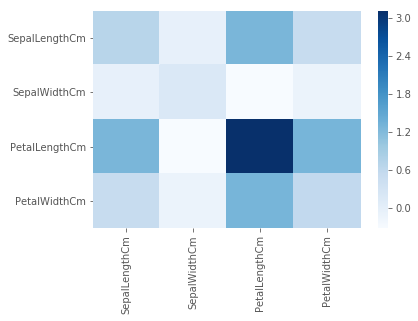

In [4]:
print("Covariance matrix")
display(irisPD.cov())
sns.heatmap(irisPD.cov(),cmap="Blues")

Correlation matrix


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


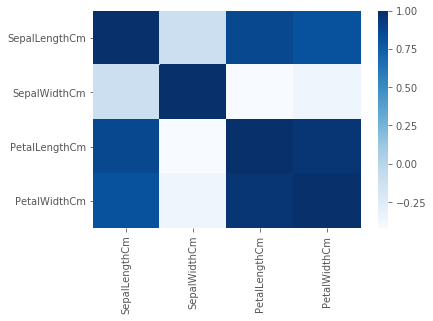

In [5]:
print("Correlation matrix")
display(irisPD.corr())
sns.heatmap(irisPD.corr(),cmap="Blues")

#### Multivariate descriptive statistics as matrix operations
---

if $\textbf{1}_{1 \times n}$ is a vector of 1's, then:

$$
\left[1_1, \dotsc, 1_i, \dotsc, 1_n \right]
\left[ \begin{array}{ccccc}
x_{1 1} & \cdots & x_{1 j} & \cdots & x_{1 p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i 1} & \cdots & x_{i j} & \cdots & x_{i p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n 1} & \cdots & x_{n j} & \cdots & x_{n p} \end{array} \right]
= \left[\sum_{i=0}^n x_{i1}, \dotsc, \sum_{i=0}^n x_{ij}, \dotsc, \sum_{i=0}^n x_{ip} \right]
\implies
\bar{\textbf{x}} = \frac{1}{n} [\textbf{1}_{1 \times n}] \textbf{X}. 
$$
Consider the following matrix opertions:

$$
\textbf{1}_{n \times 1}\bar{\textbf{x}} = 
\left[ \begin{array}{ccccc}
\bar{x}_{1} & \cdots & \bar{x}_{2} & \cdots & \bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\bar{x}_{1} & \cdots & \bar{x}_{2} & \cdots & \bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\bar{x}_{1} & \cdots & \bar{x}_{2} & \cdots & \bar{x}_{p} \\
\end{array} \right]
= \frac{1}{n} \textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}] \textbf{X}_{n \times p}
$$

It defines the residual matrix (**Data centered matrix**) as follows:

$$
\left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots & x_{1j}-\bar{x}_{2} & \cdots & x_{1p}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i1}-\bar{x}_{1} & \cdots & x_{ij}-\bar{x}_{2} & \cdots & x_{ip}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n1}-\bar{x}_{1} & \cdots & x_{nj}-\bar{x}_{2} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right]
=\textbf{X}-\frac{1}{n} \textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}]\textbf{X}
=\left(\textbf{I}-\frac{1}{n}\textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}] \right)\textbf{X} 
=\textbf{HX}
$$

Where $\textbf{H}=\textbf{I}-\frac{1}{n}\textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}]$ this matrix is known as centering matrix and has the following properties:

* It's symmetric positive semi-definite.
* It's idempotent, so that once the mean has been removed it is zero and removing it again doesn't have effect.
* It's singular. The effects of applying the transformation cannot be reversed.
* It has the eigenvalue 1 of multiplicity n − 1 and eigenvalue 0 of multiplicity 1.
* It has a nullspace of dimension 1.
* It's a projection matrix of $\mathbf{X}$, onto the (n−1)-dimensional subspace that is orthogonal to the nullspace.

It's possible to write $\textbf{S}$ in terms of $\textbf{X}$ and $\textbf{H}$ using the last properties.

$$
\begin{align*}
\textbf{S}_{p \times p}
& = \left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right] \\ \\
& = \left[ \begin{array}{ccccc}
\frac{1}{n}\sum_{k=0}^{n} (x_{1k}-\bar{x}_1)(x_{k1}-\bar{x}_1) & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{1k}-\bar{x}_1)(x_{kj}-\bar{x}_j)  & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{1k}-\bar{x}_1)(x_{kp}-\bar{x}_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{1}{n}\sum_{k=0}^{n} (x_{ik}-\bar{x}_i)(x_{k1}-\bar{x}_1) & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{ik}-\bar{x}_i)(x_{kj}-\bar{x}_j)  & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{ik}-\bar{x}_i)(x_{kp}-\bar{x}_p)  \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{1}{n}\sum_{k=0}^{n} (x_{pk}-\bar{x}_p)(x_{k1}-\bar{x}_1) & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{pk}-\bar{x}_p)(x_{kj}-\bar{x}_j)  & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{pk}-\bar{x}_p)(x_{kp}-\bar{x}_p)  
\end{array} \right] \\ \\
& = \frac{1}{n} \left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots &  x_{i1}-\bar{x}_{1} & \cdots & x_{n1}-\bar{x}_{1}\\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
 x_{1j}-\bar{x}_{2} & \cdots & x_{ij}-\bar{x}_{2} & \cdots &  x_{nj}-\bar{x}_{2} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{1p}-\bar{x}_{p} & \cdots & x_{ip}-\bar{x}_{p} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right]
\left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots & x_{1j}-\bar{x}_{2} & \cdots & x_{1p}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i1}-\bar{x}_{1} & \cdots & x_{ij}-\bar{x}_{2} & \cdots & x_{ip}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n1}-\bar{x}_{1} & \cdots & x_{nj}-\bar{x}_{2} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right] \\ \\
& = \frac{1}{n} (\textbf{HX})' \textbf{HX} = \frac{1}{n} \textbf{X'H'HX} = \frac{1}{n} \textbf{X'HHX}\\
\textbf{S} & = \frac{1}{n} \textbf{X'HX}\\
\end{align*}
$$

Consider the diagonal matrix $\textbf{D}^{1/2}$ (**sample standar deviation matrix**) and its inverse $\textbf{D}^{1/2}$  defined as:

$$
\textbf{D}^{1/2}=
\left[ \begin{array}{ccccc}
\sqrt{s_{11}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \sqrt{s_{jj}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\sqrt{s_{pp}}
\end{array} \right]
\thinspace
\textbf{D}^{-1/2}=
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{s_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{s_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{s_{pp}}}
\end{array} \right] \\
$$

Then $\textbf{R}$ could be writen as:

$$
\begin{align*}
\textbf{R}_{p \times p}
& = \left[ \begin{array}{ccccc}
1 & \cdots & r_{1j} & \cdots & r_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{i1} & \cdots & 1 & \cdots & r_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{p1} & \cdots & r_{pj} & \cdots & 1 
\end{array} \right] \\ \\
& = \left[ \begin{array}{ccccc}
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} 
\end{array} \right] \\ \\
& =
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{s_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{s_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{s_{pp}}}
\end{array} \right]
\left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right]
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{s_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{s_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{s_{pp}}}
\end{array} \right] \\ \\
\textbf{R} & = \textbf{D}^{-1/2} \textbf{S} \textbf{D}^{-1/2}
\end{align*}
$$

**Example 1.1 - 4 [Centering data sets with spark]**

Although matrix expressions help to obtain useful theoretical results, these are too computationally expensive to implement, we rather use methods based on relational algebra in order to obtain descriptive statistics.

In [6]:
irisMeansPD = irisPD.groupby(['Species']).mean()
irisMeansPD

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [7]:
def getCenteredDataMatrix(dataPD,columns,keys):
    dataframePD = dataPD.copy(deep=True)
    meanVector = dataPD.mean().to_dict()
    for col in columns:
        dataframePD['centered_'+col] = dataframePD[col]-meanVector[col]
    return dataframePD[keys+['centered_'+col for col in columns]]

In [8]:
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
keys = ['Species']
centeredIrisPD = getCenteredDataMatrix(irisPD,columns,keys)
centeredIrisPD[:10]

,Species,centered_SepalLengthCm,centered_SepalWidthCm,centered_PetalLengthCm,centered_PetalWidthCm
0,Iris-setosa,-0.743333,0.446,-2.358667,-0.998667
1,Iris-setosa,-0.943333,-0.054,-2.358667,-0.998667
2,Iris-setosa,-1.143333,0.146,-2.458667,-0.998667
3,Iris-setosa,-1.243333,0.046,-2.258667,-0.998667
4,Iris-setosa,-0.843333,0.546,-2.358667,-0.998667
5,Iris-setosa,-0.443333,0.846,-2.058667,-0.798667
6,Iris-setosa,-1.243333,0.346,-2.358667,-0.898667
7,Iris-setosa,-0.843333,0.346,-2.258667,-0.998667
8,Iris-setosa,-1.443333,-0.154,-2.358667,-0.998667
9,Iris-setosa,-0.943333,0.046,-2.258667,-1.098667


### Discriminant power

When a discriminant (or classification) model is developed, it is natural to a about which variables in our data set provide information about the target variable, usually 0 or 1, where 0 indicates a failure and 1 a success of some observed phenomenon. In some cases a simple exploratory analysis can help us discover if this relationship exists, for example if we perform a histogram of the variable of those elements that are negative and then another of those that are positive, and we observe that the histograms do not overlap too much. Marginally (without counting with other variables) the column of the dataset has a high discriminant power in case if the histograms overlap too much we can say that the column keeps a low discriminating power and therefore at first we should not include it in the This way, we will avoid investing effort in modeling with a variable that does not contribute much.

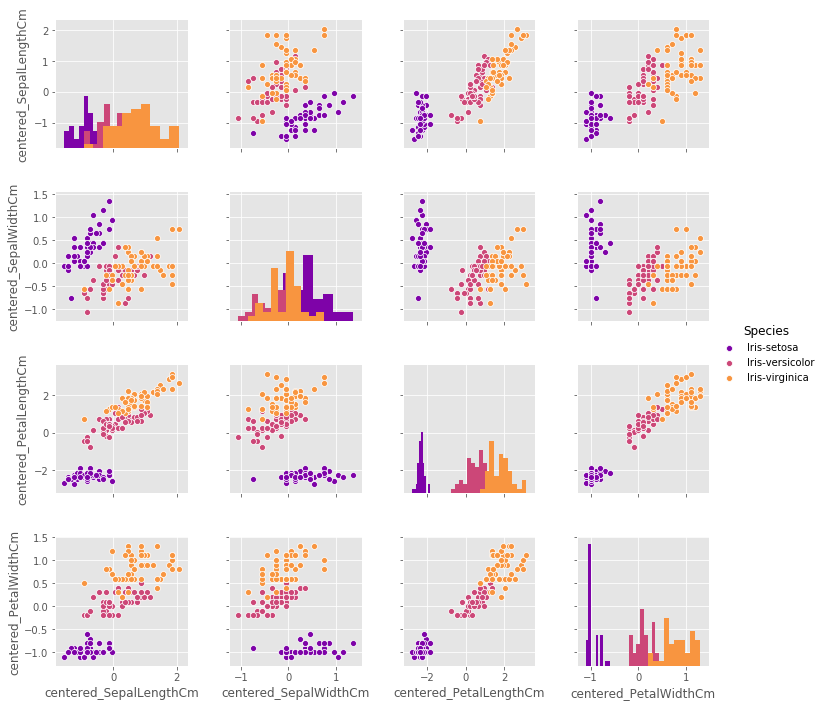

In [9]:
smpc = sns.pairplot(centeredIrisPD,hue="Species",diag_kind='hist',palette="plasma")

In [10]:
def overlapedHitograms(plt,datasetPD,columns,target,labels=None,sample=1.0,bins=10,size=(17,8),alpha=0.7):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=size)
    if labels == None:
        labels = [0,1]
    negativesPD = datasetPD[datasetPD[target]==labels[0]]
    positivesPD = datasetPD[datasetPD[target]==labels[1]]
    for i, column in enumerate(columns):
        negativeValues = negativesPD[column].values.transpose()
        positiveValues = positivesPD[column].values.transpose()
        ax = fig.add_subplot(2, 2, i+1,)
        ax.set_title('discriminant power '+column)
        ax.hist(negativeValues,bins=bins,alpha=alpha)
        ax.hist(positiveValues,bins=bins,alpha=alpha)

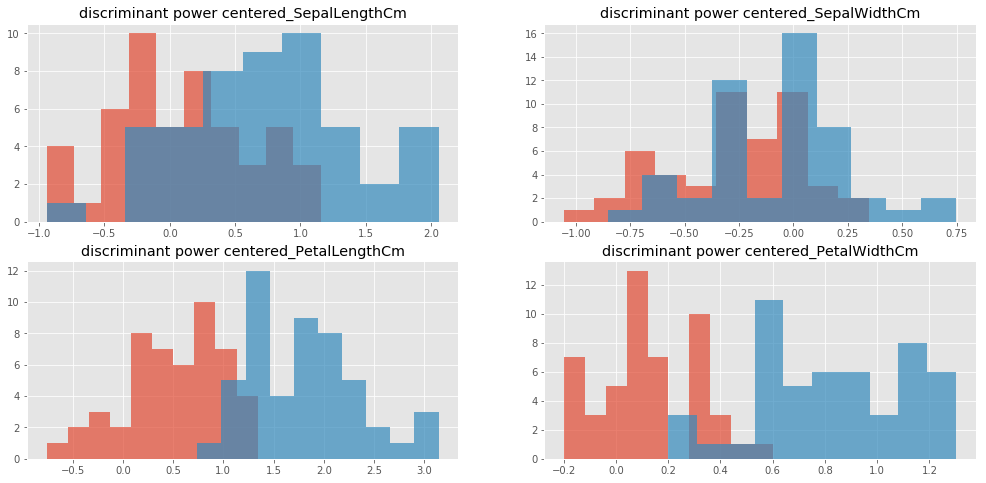

In [11]:
centeredFeatures = [col for col in centeredIrisPD.columns if col not in keys]
labels = ['Iris-versicolor','Iris-virginica']
overlapedHitograms(plt,centeredIrisPD,centeredFeatures,keys[0],labels)